In [1]:
import pandas as pd
import numpy as np
import matplotlib as 


In [2]:
bach_cont = pd.read_csv("bachelor-contestants.csv")
ette_cont = pd.read_csv("bachelorette-contestants.csv")

In [3]:
elim_data = pd.read_csv('bachelorette_538.csv')
# remove first line, which is just the header info repeated
elim_data = elim_data.drop([0])

# need to change from wide form data to long form data
# want it to be:
# SHOW, SEASON, CONTESTANT, 'TYPE', 'VALUE'
# with 'TYPE' as the current column names
elim1 = pd.melt(elim_data, id_vars=['SHOW', 'SEASON', 'CONTESTANT'])

# rename variable and value
elim1.columns = ['SHOW', 'SEASON', 'CONTESTANT', 'TYPE', 'VALUE']

# split TYPE variable
elim1[['ELIM_DATE', 'NUMBER']] = elim1['TYPE'].str.split('-',expand=True)

#convert NUMBER to numeric
pd.to_numeric(elim1['NUMBER'])
elim1.head()

,SHOW,SEASON,CONTESTANT,TYPE,VALUE,ELIM_DATE,NUMBER
0,Bachelorette,13,13_BRYAN_A,ELIMINATION-1,R1,ELIMINATION,1
1,Bachelorette,13,13_PETER_K,ELIMINATION-1,NaN,ELIMINATION,1
2,Bachelorette,13,13_ERIC_B,ELIMINATION-1,NaN,ELIMINATION,1
3,Bachelorette,13,13_DEAN_U,ELIMINATION-1,NaN,ELIMINATION,1
4,Bachelorette,13,13_ADAM_G,ELIMINATION-1,NaN,ELIMINATION,1


In [4]:
ette13 = elim1[(elim1.SEASON == '13') & (elim1.SHOW == 'Bachelorette')]
ette13.head(31)

,SHOW,SEASON,CONTESTANT,TYPE,VALUE,ELIM_DATE,NUMBER
0,Bachelorette,13,13_BRYAN_A,ELIMINATION-1,R1,ELIMINATION,1
1,Bachelorette,13,13_PETER_K,ELIMINATION-1,NaN,ELIMINATION,1
2,Bachelorette,13,13_ERIC_B,ELIMINATION-1,NaN,ELIMINATION,1
3,Bachelorette,13,13_DEAN_U,ELIMINATION-1,NaN,ELIMINATION,1
4,Bachelorette,13,13_ADAM_G,ELIMINATION-1,NaN,ELIMINATION,1
5,Bachelorette,13,13_MATT_M,ELIMINATION-1,NaN,ELIMINATION,1
6,Bachelorette,13,13_ALEX_B,ELIMINATION-1,NaN,ELIMINATION,1
7,Bachelorette,13,13_WILL_G,ELIMINATION-1,NaN,ELIMINATION,1
8,Bachelorette,13,13_KENNY_L,ELIMINATION-1,NaN,ELIMINATION,1
9,Bachelorette,13,13_ANTHONY_B,ELIMINATION-1,NaN,ELIMINATION,1


In [5]:
def getcont(week,cont_list,data):
    numelim = 'ELIMINATION-' + week
    elim = data[(data.TYPE == numelim) & ((data.VALUE == 'E')|(data.VALUE == 'EU')|(data.VALUE == 'ED')|
       (data.VALUE == 'EF'))].CONTESTANT.values
    new_cont_list = cont_list.copy()
    new_cont_list = [elem for elem in new_cont_list if elem not in elim ]
    return new_cont_list

In [6]:
w1 = pd.unique(ette13.CONTESTANT)

In [9]:
len(getcont('1',w1,ette13))

23

In [10]:
ette_cont.head()

,Name,Age,Occupation,Hometown,ElimWeek,Season
0,Ryan Sutter,29,Firefighter,"Vail, Colorado",NaN,1
1,Charlie Maher,28,Financial Analyst,"Hermosa Beach, California",6.0,1
2,Russ,30,Writer,"San Rafael, California",5.0,1
3,Greg T.,28,Importer,"Manhattan, New York",4.0,1
4,Bob Guiney,31,Mortgage Broker,"Ferndale, Michigan",3.0,1


In [3]:
ette1_cont = ette_cont[ette_cont["Season"] == 1]
ette1_cont.head(31)

,Name,Age,Occupation,Hometown,ElimWeek,Season
0,Ryan Sutter,29,Firefighter,"Vail, Colorado",NaN,1
1,Charlie Maher,28,Financial Analyst,"Hermosa Beach, California",6.0,1
2,Russ,30,Writer,"San Rafael, California",5.0,1
3,Greg T.,28,Importer,"Manhattan, New York",4.0,1
4,Bob Guiney,31,Mortgage Broker,"Ferndale, Michigan",3.0,1
5,Jamie Blyth,27,Professional Basketball Player,"Chicago, Illinois",3.0,1
6,Mike,24,Sales and Consulting,"Cincinnati, Ohio",3.0,1
7,Rob,29,Computer Programmer,"Dallas, Texas",3.0,1
8,Brian C.,28,Mortgage Broker,"Dallas, Texas",2.0,1
9,Brian S.,28,Sales Engineer,"Dallas, Texas",2.0,1


In [16]:
w1_sa = ette1_cont.copy()
w1_sa['E'] = np.where(w1_sa['ElimWeek'] == 1, '1','0')
w1_sa['E'] = w1_sa['E'].astype(int)
w1_sa['T'] = 1
w1_sa.head(31)

,Name,Age,Occupation,Hometown,ElimWeek,Season,E,T
0,Ryan Sutter,29,Firefighter,"Vail, Colorado",NaN,1,0,1
1,Charlie Maher,28,Financial Analyst,"Hermosa Beach, California",6.0,1,0,1
2,Russ,30,Writer,"San Rafael, California",5.0,1,0,1
3,Greg T.,28,Importer,"Manhattan, New York",4.0,1,0,1
4,Bob Guiney,31,Mortgage Broker,"Ferndale, Michigan",3.0,1,0,1
5,Jamie Blyth,27,Professional Basketball Player,"Chicago, Illinois",3.0,1,0,1
6,Mike,24,Sales and Consulting,"Cincinnati, Ohio",3.0,1,0,1
7,Rob,29,Computer Programmer,"Dallas, Texas",3.0,1,0,1
8,Brian C.,28,Mortgage Broker,"Dallas, Texas",2.0,1,0,1
9,Brian S.,28,Sales Engineer,"Dallas, Texas",2.0,1,0,1


In [5]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

In [19]:
T = w1_sa["T"]
E = w1_sa["E"]

kmf.fit(T, event_observed=E)

<lifelines.KaplanMeierFitter: fitted with 25 observations, 15 censored>

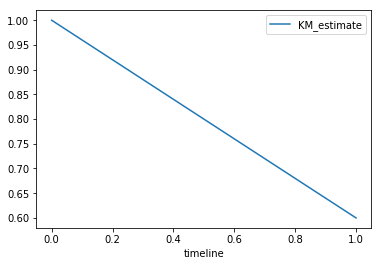

In [21]:
kmf.survival_function_.plot()
# plt.title('Survival function of Bachelorette 1');

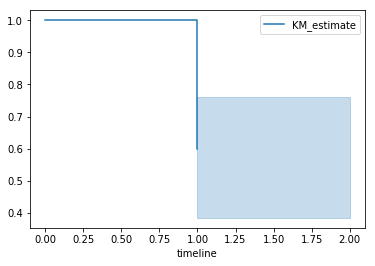

In [22]:
kmf.plot()

In [23]:
kmf.median_

inf

In [33]:
w5_sa = ette1_cont.copy()
w5_sa['E'] = np.where(w5_sa['ElimWeek'] <= 5, 1,0)
# w5_sa['E'] = w5_sa['E'].astype(int)
w5_sa['T'] = np.where(w5_sa['ElimWeek'] <= 5, w5_sa['ElimWeek'],5)
w5_sa.head(31)

,Name,Age,Occupation,Hometown,ElimWeek,Season,E,T
0,Ryan Sutter,29,Firefighter,"Vail, Colorado",NaN,1,0,5.0
1,Charlie Maher,28,Financial Analyst,"Hermosa Beach, California",6.0,1,0,5.0
2,Russ,30,Writer,"San Rafael, California",5.0,1,1,5.0
3,Greg T.,28,Importer,"Manhattan, New York",4.0,1,1,4.0
4,Bob Guiney,31,Mortgage Broker,"Ferndale, Michigan",3.0,1,1,3.0
5,Jamie Blyth,27,Professional Basketball Player,"Chicago, Illinois",3.0,1,1,3.0
6,Mike,24,Sales and Consulting,"Cincinnati, Ohio",3.0,1,1,3.0
7,Rob,29,Computer Programmer,"Dallas, Texas",3.0,1,1,3.0
8,Brian C.,28,Mortgage Broker,"Dallas, Texas",2.0,1,1,2.0
9,Brian S.,28,Sales Engineer,"Dallas, Texas",2.0,1,1,2.0


In [35]:
T5 = w5_sa["T"]
E5 = w5_sa["E"]

kmf.fit(T5, event_observed=E5)

<lifelines.KaplanMeierFitter: fitted with 25 observations, 2 censored>

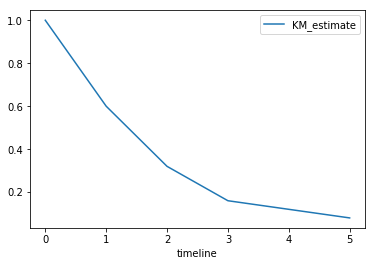

In [36]:
kmf.survival_function_.plot()

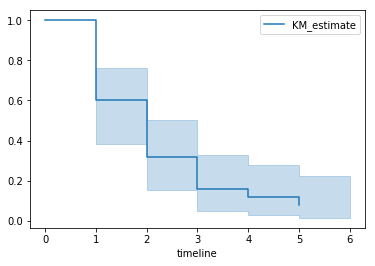

In [37]:
kmf.plot()

In [38]:
kmf.median_

2.0

50% chance of 2 weeks or less?

In [39]:
from lifelines import NelsonAalenFitter
naf = NelsonAalenFitter()

naf.fit(T5,event_observed=E5)

<lifelines.NelsonAalenFitter: fitted with 25 observations, 2 censored>

          NA_estimate
timeline             
0.0          0.000000
1.0          0.497729
2.0          1.098101
3.0          1.732625
4.0          1.982625


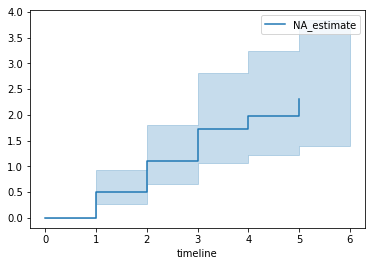

In [40]:
print(naf.cumulative_hazard_.head())
naf.plot()